In [1]:
from manim import *
import numpy as np
import math
config.verbosity = "WARNING"

In [2]:
%%manim --quality=m CountAllIntegers

class CountAllIntegers(Scene):
    def construct(self):
        """
        Draws a number line from -5 to 5
        The animates "counting" the number line by showing
        a new number above the number line. Starting with 0 over 0,
        1 over 1, then 2 over -1, then 3 over 2, 4 over -2 and so on.
        """
        self.camera.background_color = "#d6e8e1"
        number_line = NumberLine(x_range=[-3, 3, 1], length=10, include_numbers=True, color=BLACK, font_size=46, stroke_width=4)
        for number in number_line.numbers:
            number.set_color(BLACK)
        self.play(Create(number_line))
        # self.play(FadeIn(number_line), run_time=0.5)
        self.wait(0.5)


        positions = [0]
        for n in range(1, 4):
            positions.append(n)
            positions.append(-n)

        count = 0
        shown = set()
        for pos in positions:
            if pos in shown or pos < -3 or pos > 3:
                continue
            shown.add(pos)
            count += 1
            label = Integer(count, font_size=60, color="#8a2b16")
            label.next_to(number_line.n2p(pos), UP, buff=1 if pos < 0 else 0.25)
            # label.set_color("#d56e57")
            self.play(FadeIn(label), run_time=0.5)
            self.wait(0.4)
        
        self.wait(3)


Manim Community v0.19.0

Manim Community v0.19.0

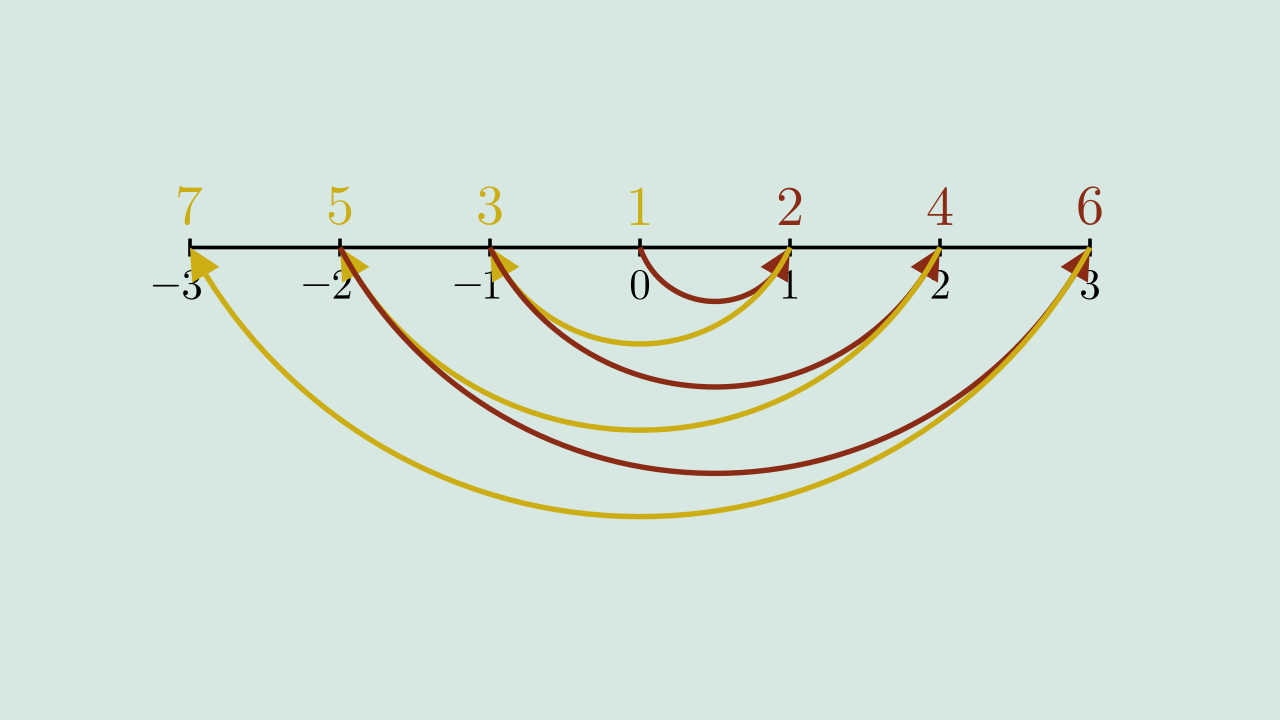

In [3]:
%%manim --quality=m --save_last_frame CountAllIntegersWithArrows

class CountAllIntegersWithArrows(Scene):
    def construct(self):
        """
        Draws a number line from -5 to 5
        The animates "counting" the number line by showing
        a new number above the number line. Starting with 0 over 0,
        1 over 1, then 2 over -1, then 3 over 2, 4 over -2 and so on.
        """
        self.camera.background_color = "#d6e8e1"
        number_line = NumberLine(x_range=[-3, 3, 1], length=10, include_numbers=True, color=BLACK, font_size=46, stroke_width=4)
        number_line.shift(UP * 1.25)
        for number in number_line.numbers:
            number.set_color(BLACK)
        self.play(FadeIn(number_line), run_time=0.2)
        # self.play(FadeIn(number_line), run_time=0.5)
        self.wait(0.5)


        positions = [0]
        for n in range(1, 4):
            positions.append(n)
            positions.append(-n)

        count = 0
        shown = set()
        last_pos = None
        for pos in positions:
            if pos in shown or pos < -3 or pos > 3:
                continue
            shown.add(pos)
            count += 1
            color = "#8a2b16" if pos > 0 else "#ccad13"
            label = Integer(count, font_size=60, color=color)
            label.next_to(number_line.n2p(pos), UP)
            # Draw a curving arrow from last_pos to pos
            if last_pos is not None:
                start = number_line.n2p(last_pos)
                end = number_line.n2p(pos)
                # Use a CurvedArrow with angle depending on direction
                angle = 120*math.pi/180 if pos > last_pos else -120*math.pi/180
                arrow = CurvedArrow(start, end, angle=angle, color=color, stroke_width=6)
                self.play(Create(arrow), run_time=0.5)
            self.play(FadeIn(label), run_time=0.5)
            self.wait(0.4)
            last_pos = pos
        self.wait(3)

In [34]:
# %%manim --quality=m BinaryDigitTable
# TODO: get new python with pyenv, then upgrade all packages and see what happens
from typing import Sequence


class BinaryDigitTable(Scene):
    def create_row_at_a_time(self, table: Table):
        animations: Sequence[Animation] = [
            FadeIn(
                VGroup(table.horizontal_lines, table.get_col_labels()),
            ),
        ]

        i = 0
        for row in table.get_rows():
            if i == 0:
                i += 1
                continue
            animations.append(FadeIn(row))

        return AnimationGroup(*animations, lag_ratio=1)
    
    def construct(self):
        """
        Draw a 6x5 grid without outside borders.
        The grid should look like this
        - | - | 1 | 2 | 3 | 4 | 5
        1 | 0.| 0 | 0 | 0 | 0 | 0
        2 | 0.| 0 | 0 | 0 | 0 | 0
        3 | 0.| 0 | 0 | 0 | 0 | 0 
        4 | 0.| 0 | 0 | 0 | 0 | 0 
        """
        self.camera.background_color = "#d6e8e1"
        rows = 5
        cols = 6

        # Create the table data
        table_data = []
        col_labels =  [str(i+1) for i in range(cols-1)] + ["6..."]
        row_labels = ["0." for i in range(rows)]
        for i in range(rows):
            row = []
            for j in range(cols):
                row.append("0" if j < 5 else "0...")
            table_data.append(row)

        table = Table(
            table_data,
            row_labels=[Text(r) for r in row_labels],
            col_labels=[Text(r) for r in col_labels],
            include_outer_lines=False,
            line_config={"stroke_width": 2, "color": BLACK},
            element_to_mobject_config={"font_size": 36},
        )
        lines: VGroup = table.vertical_lines
        for line in lines:
            line.set_opacity(0)
        table.scale(0.9)
        table.move_to(ORIGIN)

        for item in table.get_entries():
            item.set_color(BLACK)

        self.play(self.create_row_at_a_time(table))
        self.wait(2)

In [35]:
%manim --quality=m BinaryDigitTable

Manim Community v0.19.0